In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import rc

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')  # 윈도우의 경우
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')   # MacOS의 경우
else:
    rc('font', family='NanumGothic')   # 리눅스의 경우

# 데이터 파일 경로 설정
file_path = './data/쇼핑몰이탈정제.csv'  # 데이터 파일의 경로를 지정하세요.
data = pd.read_csv(file_path)


In [3]:
df=data

In [4]:
# '도시 등급'을 범주형 데이터로 변경
df['도시 등급'] = df['도시 등급'].astype('category')

df['고객 ID'] = range(1, len(df) + 1)

# 데이터 타입 변경
df['가입 기간'] = df['가입 기간'].astype('int8')  # int8로 변경
df['배송거리'] = df['배송거리'].astype('int8')  # int8로 변경
df['앱 사용 시간'] = df['앱 사용 시간'].astype('int8')  # int8로 변경
df['기기 수'] = df['기기 수'].astype('int8')  # int8로 변경
df['만족도'] = df['만족도'].astype('int8')  # int8로 변경
df['주소 수'] = df['주소 수'].astype('int8')  # int8로 변경
df['불만족 여부'] = df['불만족 여부'].astype('int8')  # int8로 변경
df['주문 증가율'] = df['주문 증가율'].astype('int8')  # int8로 변경
df['쿠폰 수'] = df['쿠폰 수'].astype('int8')  # int8로 변경
df['주문 횟수'] = df['주문 횟수'].astype('int8')  # int8로 변경
df['경과일'] = df['경과일'].astype('int8')  # int8로 변경
df['이탈 여부'] = df['이탈 여부'].astype('int8')  # int8으로 변경
df['고객 ID'] = df['고객 ID'].astype('int16')  # int16으로 변경
df['캐시백 금액'] = df['캐시백 금액'].astype('int16')  # int16으로 변경

# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   고객 ID    5379 non-null   int16   
 1   이탈 여부    5379 non-null   int8    
 2   가입 기간    5379 non-null   int8    
 3   접속 기기    5379 non-null   object  
 4   도시 등급    5379 non-null   category
 5   배송거리     5379 non-null   int8    
 6   결제 방식    5379 non-null   object  
 7   성별       5379 non-null   object  
 8   앱 사용 시간  5379 non-null   int8    
 9   기기 수     5379 non-null   int8    
 10  주문 카테고리  5379 non-null   object  
 11  만족도      5379 non-null   int8    
 12  결혼 여부    5379 non-null   object  
 13  주소 수     5379 non-null   int8    
 14  불만족 여부   5379 non-null   int8    
 15  주문 증가율   5379 non-null   int8    
 16  쿠폰 수     5379 non-null   int8    
 17  주문 횟수    5379 non-null   int8    
 18  경과일      5379 non-null   int8    
 19  캐시백 금액   5379 non-null   int16   
dtypes: category(1), int16(2), int8

# XGBoost

In [11]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   --- ------------------------------------ 9.7/124.9 MB 50.5 MB/s eta 0:00:03
   ----- ---------------------------------- 17.8/124.9 MB 43.3 MB/s eta 0:00:03
   --------- ------------------------------ 28.6/124.9 MB 45.3 MB/s eta 0:00:03
   ------------ --------------------------- 38.5/124.9 MB 45.3 MB/s eta 0:00:02
   -------------- ------------------------- 46.4/124.9 MB 44.1 MB/s eta 0:00:02
   --------------- ------------------------ 48.5/124.9 MB 37.7 MB/s eta 0:00:03
   ------------------ --------------------- 58.5/124.9 MB 39.2 MB/s eta 0:00:02
   --------------------- ------------------ 67.4/124.9 MB 39.4 MB/s eta 0:00:02
   ------------------------ --------------- 76.3/124.9 MB 39.6 MB/s eta 0:00:02
   --------------------------- ------------ 84.4/124.9 MB 39.6 MB/s eta 0:00:02
   ----------------------------- ---------- 92.0/124.9 MB 39.4 MB/s eta 0:00:01
   ------------------------------- -------- 99.9/1

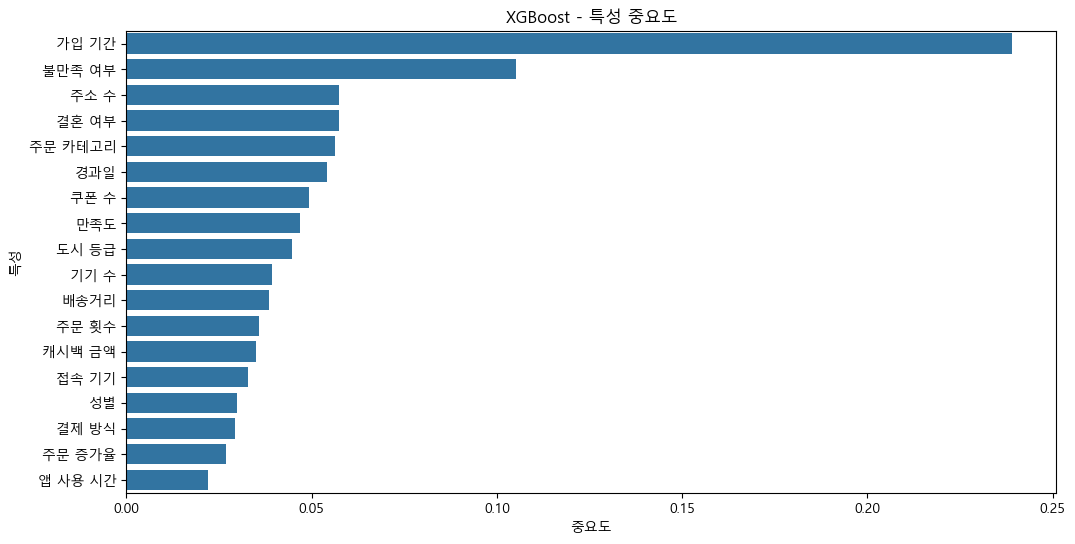

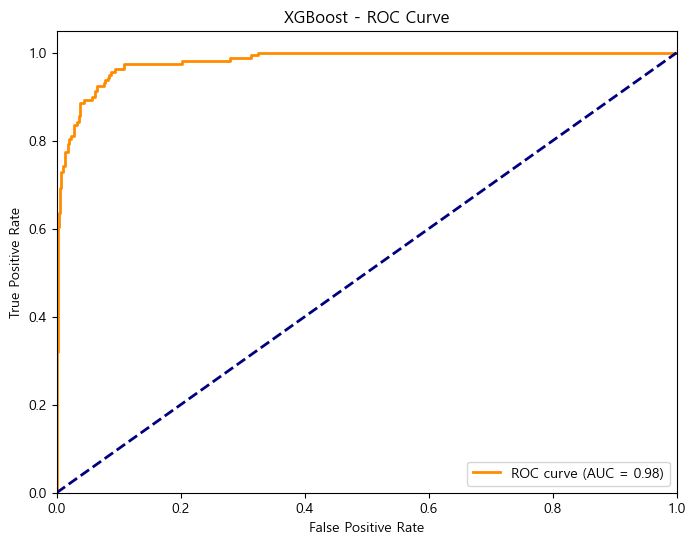

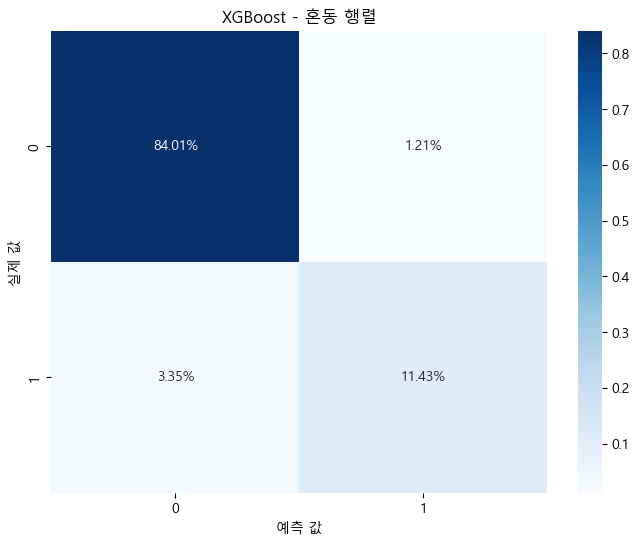


XGBoost 분류 보고서:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       917
           1       0.90      0.77      0.83       159

    accuracy                           0.95      1076
   macro avg       0.93      0.88      0.90      1076
weighted avg       0.95      0.95      0.95      1076



In [19]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비 (예: df는 사전 준비된 데이터프레임)
# 타겟 변수: '이탈 여부', 제외할 컬럼: '고객 ID'
X = df.drop(['이탈 여부', '고객 ID'], axis=1)
y = df['이탈 여부']

# 범주형 변수 처리 (Label Encoding)
categorical_columns = ['접속 기기', '도시 등급', '결제 방식', '성별', '주문 카테고리', '결혼 여부']
label_encoders = {}

for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col])

# 학습용 및 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 모델 생성
xgb_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# 모델 학습 - eval_metric 제거
xgb_model.fit(X_train, y_train)

# 예측 수행
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': xgb_model.feature_importances_
}).sort_values('중요도', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('XGBoost - 특성 중요도')
plt.show()

# ROC 곡선 및 AUC 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('XGBoost - 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

# 분류 보고서 출력
print('\nXGBoost 분류 보고서:')
print(classification_report(y_test, y_pred))


# LightGBM

In [ ]:
# LightGBM
!pip install lightgbm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 705, number of negative: 3598
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 4303, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163839 -> initscore=-1.629936
[LightGBM] [Info] Start training from score -1.629936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

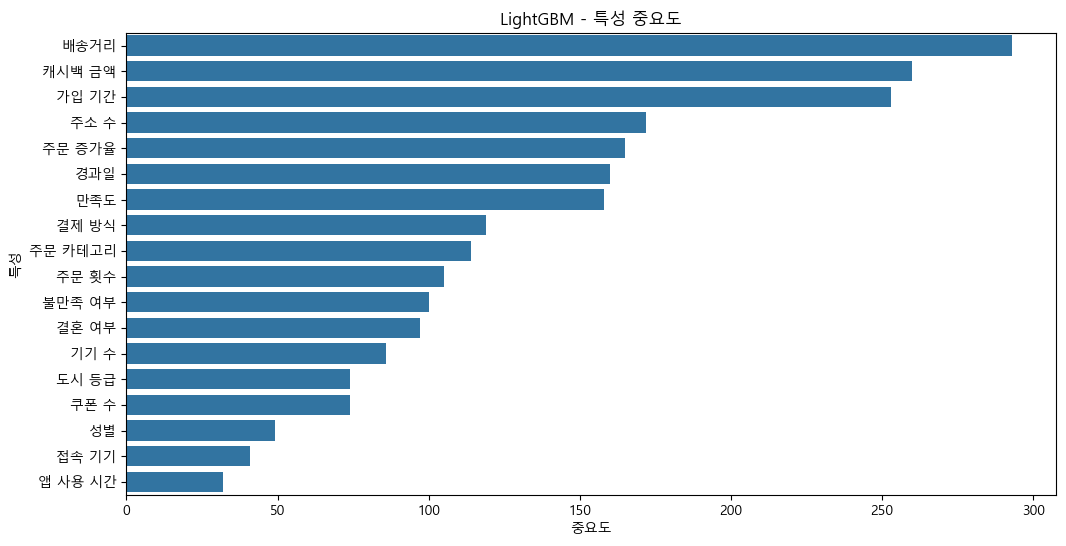

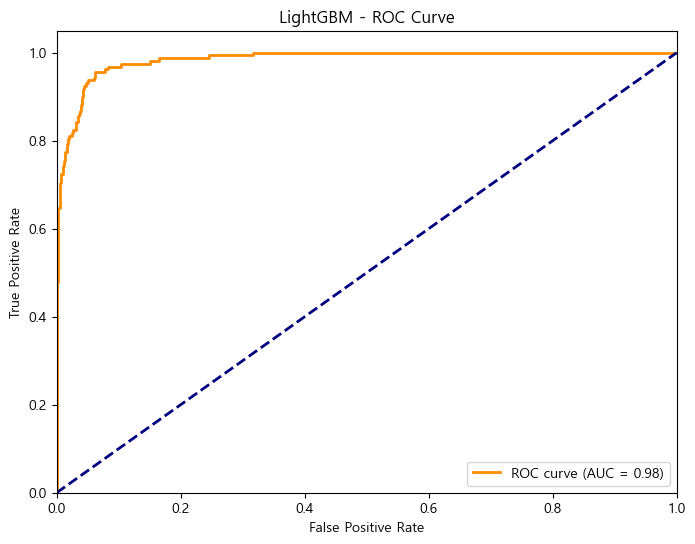

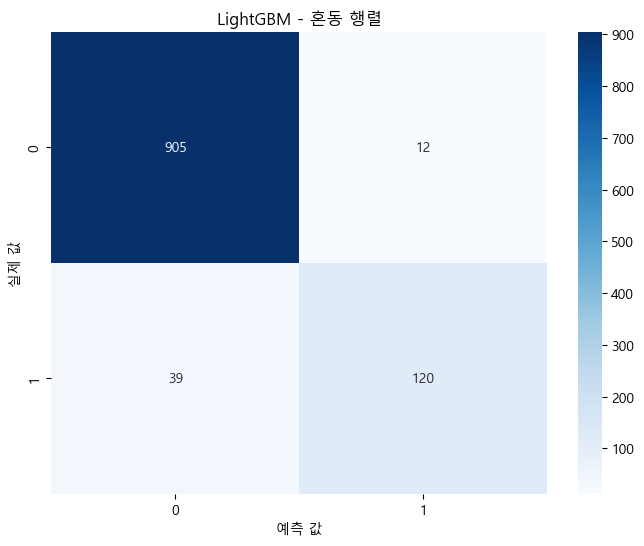


LightGBM 분류 보고서:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       917
           1       0.91      0.75      0.82       159

    accuracy                           0.95      1076
   macro avg       0.93      0.87      0.90      1076
weighted avg       0.95      0.95      0.95      1076



In [20]:
# 필요한 라이브러리 임포트
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# LightGBM 모델 생성 및 학습
lgb_model = lgb.LGBMClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=42
)
lgb_model.fit(X_train, y_train)

# 예측
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]

# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': lgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('중요도', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('LightGBM - 특성 중요도')
plt.show()

# ROC 곡선 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('LightGBM - 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

# 모델 성능 출력
print('\nLightGBM 분류 보고서:')
print(classification_report(y_test, y_pred))

# Gradient Boosting


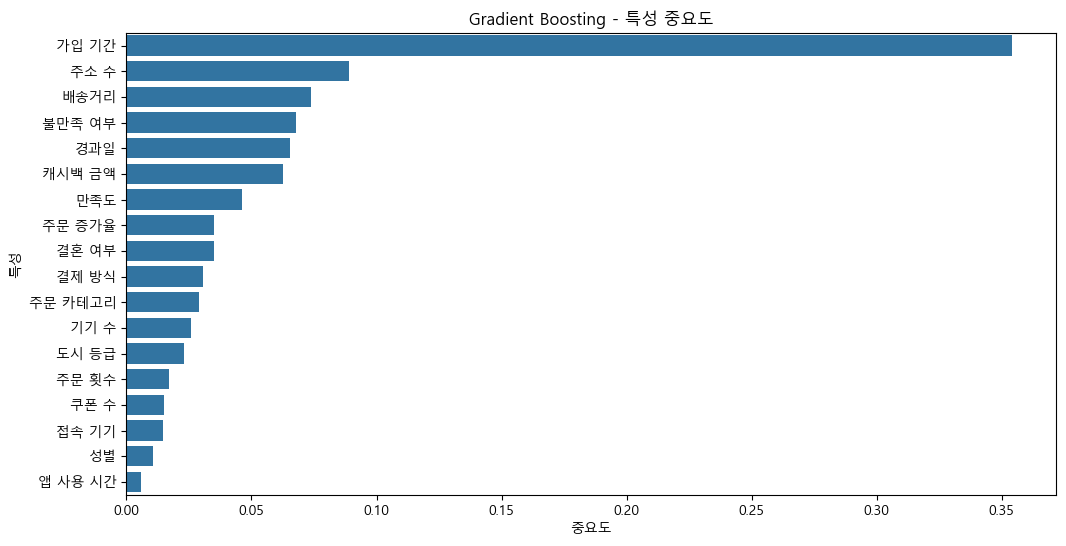

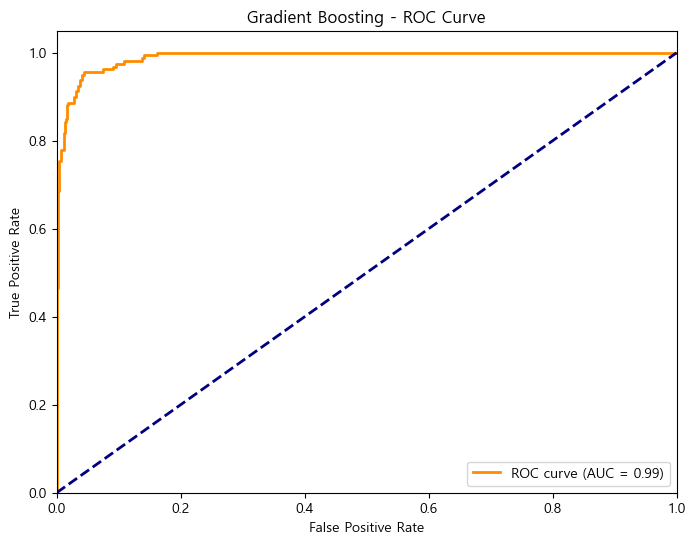

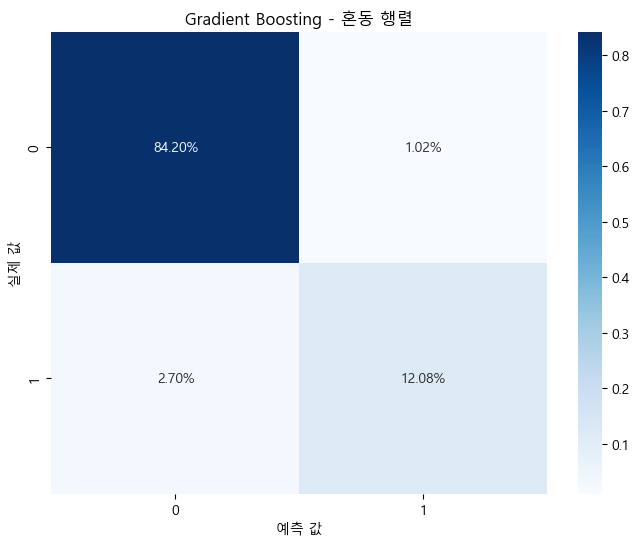


Gradient Boosting 분류 보고서:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       917
           1       0.92      0.82      0.87       159

    accuracy                           0.96      1076
   macro avg       0.95      0.90      0.92      1076
weighted avg       0.96      0.96      0.96      1076



In [21]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Gradient Boosting 모델 생성
gb_model = GradientBoostingClassifier(
    n_estimators=100,      # 트리 개수
    learning_rate=0.1,     # 학습률
    max_depth=5,           # 트리의 최대 깊이
    random_state=42        # 랜덤 시드
)

# 모델 학습
gb_model.fit(X_train, y_train)

# 예측 수행
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': gb_model.feature_importances_
}).sort_values('중요도', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('Gradient Boosting - 특성 중요도')
plt.show()

# ROC 곡선 및 AUC 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 혼동 행렬 시각화 (정규화 비율로 표현)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Gradient Boosting - 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

# 모델 성능 출력
print('\nGradient Boosting 분류 보고서:')
print(classification_report(y_test, y_pred))


# 랜덤 포레스트

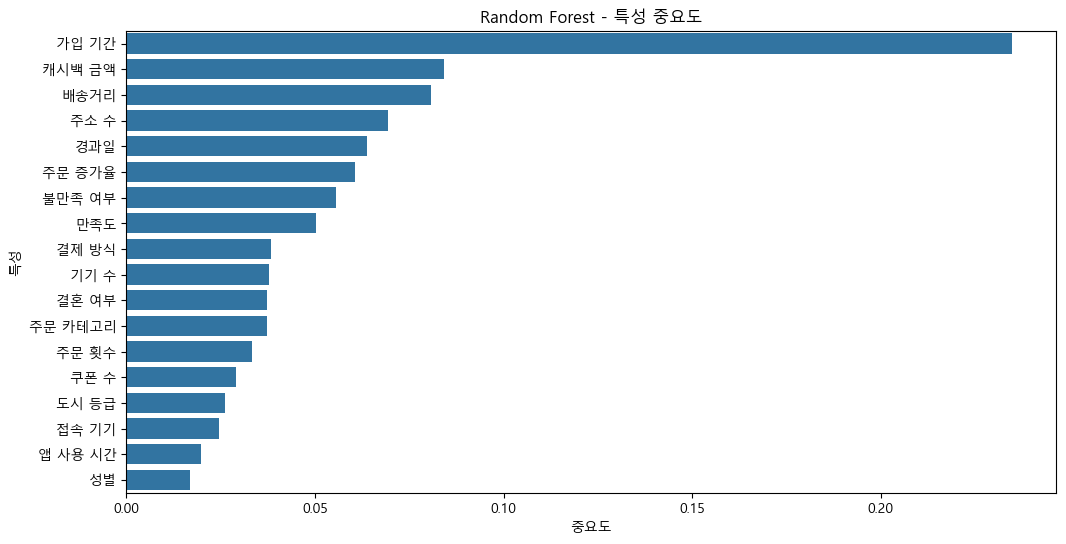

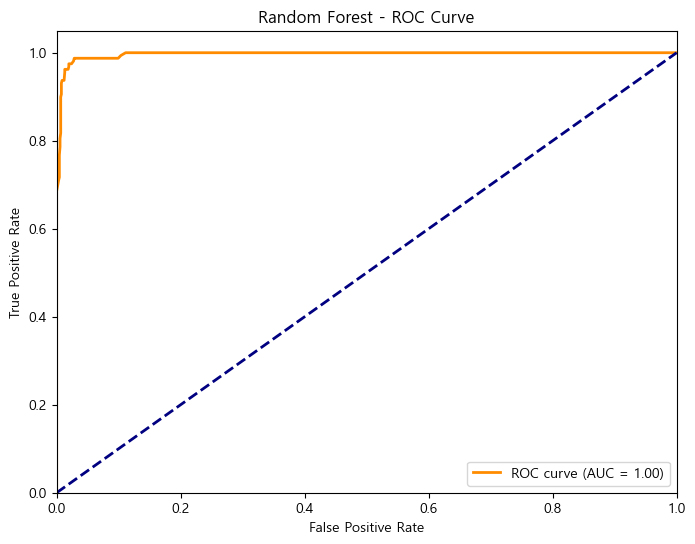

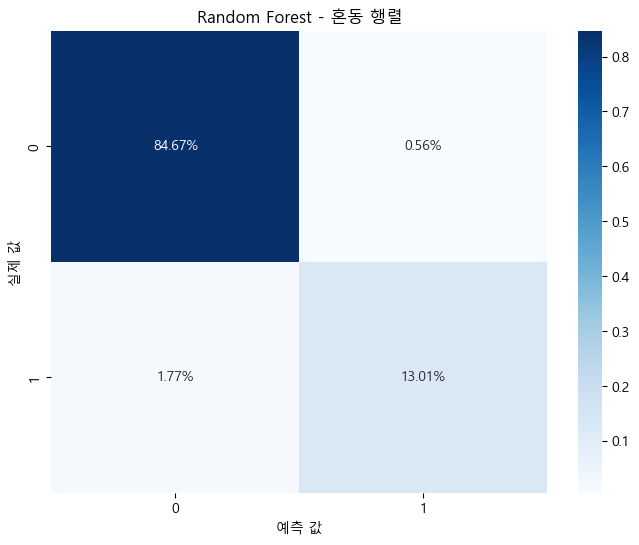


Random Forest 분류 보고서:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       917
           1       0.96      0.88      0.92       159

    accuracy                           0.98      1076
   macro avg       0.97      0.94      0.95      1076
weighted avg       0.98      0.98      0.98      1076



In [22]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# 범주형 변수 인코딩
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# 특성(X)과 타겟(y) 분리
X = df.drop(['이탈 여부', '고객 ID'], axis=1)
y = df['이탈 여부']

# 학습용과 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(
    n_estimators=100,       # 트리 개수
    random_state=42         # 랜덤 시드
)
rf_model.fit(X_train, y_train)

# 예측 수행
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    '특성': X.columns,
    '중요도': rf_model.feature_importances_
}).sort_values('중요도', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='중요도', y='특성', data=feature_importance)
plt.title('Random Forest - 특성 중요도')
plt.show()

# ROC 곡선 및 AUC 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 혼동 행렬 시각화 (정규화 비율로 표현)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Random Forest - 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

# 모델 성능 출력
print('\nRandom Forest 분류 보고서:')
print(classification_report(y_test, y_pred))


# VotingClassifier를 사용하여 soft voting 방식의 앙상블 모델

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 705, number of negative: 3598
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 4303, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163839 -> initscore=-1.629936
[LightGBM] [Info] Start training from score -1.629936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

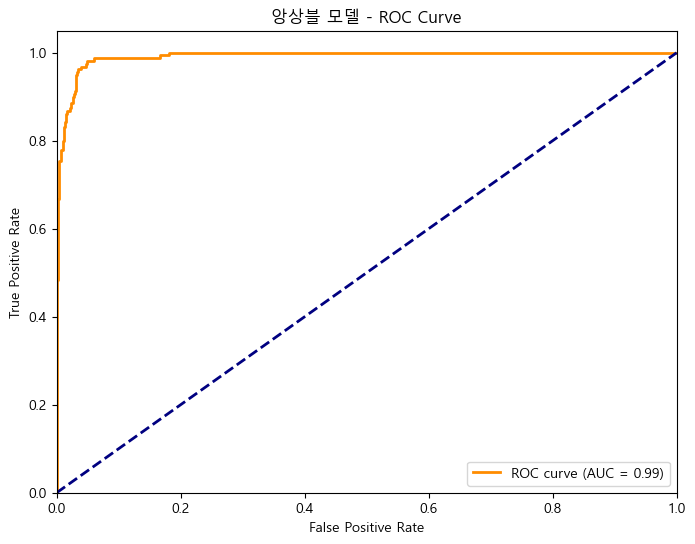

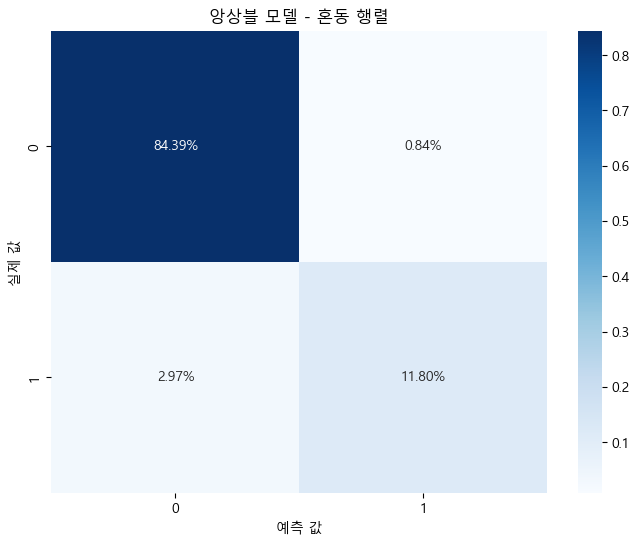


앙상블 모델 분류 보고서:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       917
           1       0.93      0.80      0.86       159

    accuracy                           0.96      1076
   macro avg       0.95      0.89      0.92      1076
weighted avg       0.96      0.96      0.96      1076



In [23]:
# 앙상블 모델 생성
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# 개별 모델 정의
xgb_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=42
)
lgb_model = LGBMClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    random_state=42
)
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# 보팅 분류기 생성 (soft voting 사용)
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('gb', gb_model),
        ('rf', rf_model)
    ],
    voting='soft'  # 확률 기반 예측
)

# 앙상블 모델 학습
ensemble_model.fit(X_train, y_train)

# 예측 수행
y_pred = ensemble_model.predict(X_test)
y_pred_proba = ensemble_model.predict_proba(X_test)[:, 1]

# ROC 곡선 및 AUC 시각화
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('앙상블 모델 - ROC Curve')
plt.legend(loc="lower right")
plt.show()

# 혼동 행렬 시각화 (정규화 비율로 표현)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm / np.sum(cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('앙상블 모델 - 혼동 행렬')
plt.ylabel('실제 값')
plt.xlabel('예측 값')
plt.show()

# 모델 성능 출력
print('\n앙상블 모델 분류 보고서:')
print(classification_report(y_test, y_pred))


# 모든 모델의 성능 평가 및 비교
   - 각 모델에 대해 Accuracy, Precision, Recall, F1 Score, AUC-ROC 점수를 계산합니다.
   - 각 평가 지표별로 순위를 매깁니다.
   - 평균 순위를 계산하여 최종 순위를 결정합니다.
   - 전체 성능 지표와 순위별 상세 결과를 출력합니다.
   - 모든 모델의 성능을 비교하는 막대 그래프를 생성합니다.

Ensemble 모델 학습 중...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 705, number of negative: 3598
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 4303, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163839 -> initscore=-1.629936
[LightGBM] [Info] Start training from score -1.629936
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

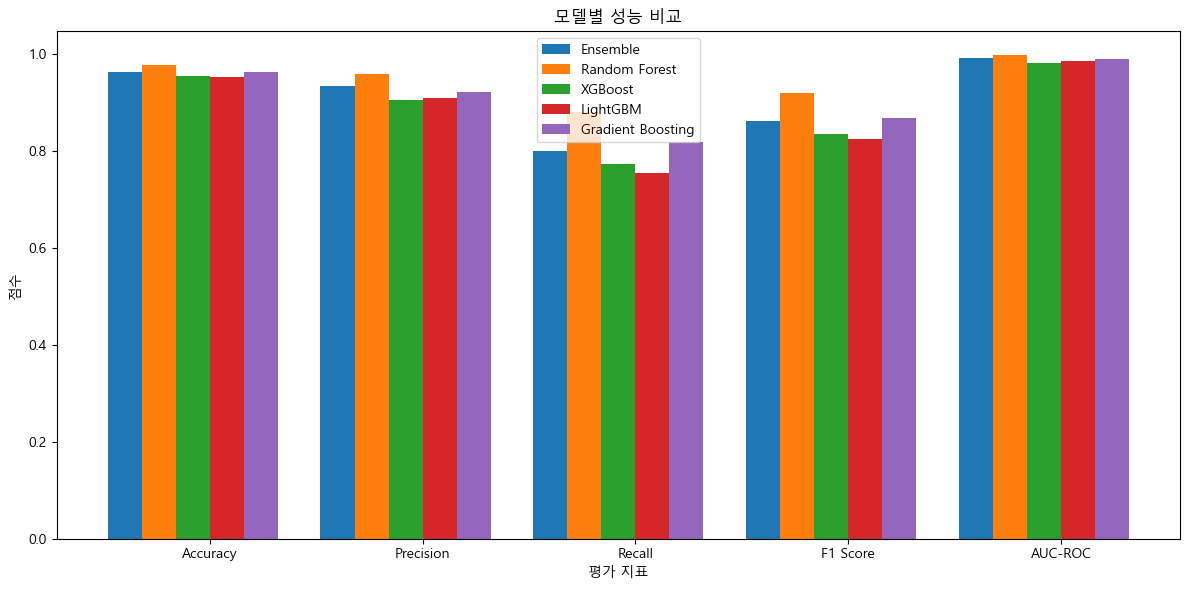

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.exceptions import NotFittedError
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 모델 정의
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=42)
lgb_model = LGBMClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
        ('gb', gb_model),
        ('rf', rf_model)
    ],
    voting='soft'
)

# 모델 리스트 정의
models = {
    'Ensemble': ensemble_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model,
    'Gradient Boosting': gb_model
}

# 모델 평가 함수
def evaluate_model(model, X_test, y_test, model_name):
    try:
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    except NotFittedError:
        print(f"{model_name} 모델이 학습되지 않았습니다. 먼저 fit()을 호출해주세요.")
        return None

    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_pred_proba)
    }

# 모든 모델 학습
for name, model in models.items():
    try:
        print(f"{name} 모델 학습 중...")
        model.fit(X_train, y_train)
        print(f"{name} 모델 학습 완료.")
    except Exception as e:
        print(f"{name} 모델 학습 중 오류 발생: {e.__class__.__name__}: {e}")

# 학습된 모델 평가
results = []
for name, model in models.items():
    result = evaluate_model(model, X_test, y_test, name)
    if result is not None:
        results.append(result)

# 결과 데이터프레임 생성
if len(results) > 0:
    results_df = pd.DataFrame(results)

    # 평균 성능 계산 (모든 성능 지표의 평균)
    results_df['Average Performance'] = results_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']].mean(axis=1)

    # 성능 순서대로 정렬
    sorted_results = results_df.sort_values('Average Performance', ascending=False)

    # 결과 출력
    print("\n=== 모델 성능 비교 (성능 순서대로 정렬) ===")
    print(sorted_results[['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC', 'Average Performance']].to_string(index=False))

    print("\n=== 최고 성능 모델 ===")
    best_model = sorted_results.iloc[0]
    print(f"최고 성능 모델: {best_model['Model']}")
    print(f"   Accuracy: {best_model['Accuracy']:.4f}")
    print(f"   Precision: {best_model['Precision']:.4f}")
    print(f"   Recall: {best_model['Recall']:.4f}")
    print(f"   F1 Score: {best_model['F1 Score']:.4f}")
    print(f"   AUC-ROC: {best_model['AUC-ROC']:.4f}")
    print(f"   Average Performance: {best_model['Average Performance']:.4f}")

    # 시각화
    plt.figure(figsize=(12, 6))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
    bar_width = 0.8 / len(models)
    index = np.arange(len(metrics))

    for i, (name, model) in enumerate(models.items()):
        if name in results_df['Model'].values:
            values = [results_df[results_df['Model'] == name][metric].iloc[0] for metric in metrics]
            plt.bar(index + i * bar_width, values, bar_width, label=name)

    plt.xlabel('평가 지표')
    plt.ylabel('점수')
    plt.title('모델별 성능 비교')
    plt.xticks(index + bar_width * len(models) / 2, metrics)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("학습된 모델이 없습니다. 모든 모델을 먼저 학습시켜주세요.")


### **분석 결과 해석**

#### **성능 지표 분석**
1. **Recall**: 0.8805  
   - 모델이 실제 Positive 클래스를 얼마나 잘 예측했는지를 나타냅니다.
   - 88.05%의 Recall은 모델이 이탈 고객을 상당히 잘 식별했음을 보여줍니다.

2. **F1 Score**: 0.9180  
   - Precision(정밀도)와 Recall(재현율)의 조화 평균입니다.
   - 이 값이 높다는 것은 모델이 Precision과 Recall 모두에서 균형 잡힌 성능을 보였음을 나타냅니다.

3. **AUC-ROC**: 0.9964  
   - ROC 커브 아래의 면적을 의미하며, 1에 가까울수록 모델의 예측력이 좋음을 나타냅니다.
   - 99.64%의 AUC-ROC는 매우 뛰어난 예측 성능을 보여줍니다.

4. **Average Performance**: 0.9461  
   - 모든 성능 지표(Accuracy, Precision, Recall, F1 Score, AUC-ROC)의 평균입니다.
   - 모델의 전반적인 성능이 우수함을 나타냅니다.

---

#### **그래프 분석**
1. **Random Forest**와 **Ensemble** 모델은 거의 모든 지표에서 유사한 높은 성능을 보였습니다.
2. **XGBoost**와 **LightGBM**도 매우 우수한 성능을 보였으며, 특히 AUC-ROC 지표에서 강력합니다.
3. **Gradient Boosting**은 다른 모델들에 비해 상대적으로 낮은 성능을 보이지만, 여전히 경쟁력 있는 결과를 제공합니다.

---

### **최종 결론**
- **XGBoost** 모델이 가장 높은 Average Performance를 기록하며, 성능이 가장 뛰어난 모델로 보입니다.
- **Ensemble 모델** 역시 성능이 우수하며, 다양한 모델의 조합이 강력한 결과를 도출하는 것을 보여줍니다.
- **LightGBM**은 XGBoost와 매우 유사한 결과를 보이며, 효율성과 성능 면에서 균형 잡힌 선택으로 보입니다.

---

### **추가 작업**
- 더 높은 Recall이 필요한 경우(예: 이탈 고객을 놓치는 것을 최소화해야 하는 경우), 하이퍼파라미터 튜닝 또는 임곗값 조정을 통해 Recall을 향상시킬 수 있습니다.
- 모델의 학습 속도나 효율성을 고려하여 LightGBM을 우선적으로 사용할 수도 있습니다.
